<a href="https://colab.research.google.com/github/Phanuwat-S-S/229351-StatisticalLearning/blob/main/229351_LAB10_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [1]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-10-31 10:45:32--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.009s  

2025-10-31 10:45:32 (15.5 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [3]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-2705365328.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

In [4]:
data_monthly = data['MaxTemp'].resample("M").mean()

data_monthly.head()

/tmp/ipython-input-3219926365.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean()


,MaxTemp
Date,
1998-01-31,31.687097
1998-02-28,33.685714
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848387


In [5]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))



Training set size: 7858
Test set size: 24

กำลังทดสอบโมเดล Holt-Winters แบบต่างๆ...


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model: Additive, RMSE: nan


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model: Multiplicative, RMSE: nan


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model: Damped Additive, RMSE: nan


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Model: Damped Multiplicative, RMSE: nan

--- สรุปผล ---
ไม่สามารถสร้างโมเดล Holt-Winters ได้เลย กรุณาตรวจสอบข้อมูล (อาจมีค่าติดลบใน Multiplicative model)


ValueError: x, y, and format string must not be None

<Figure size 1500x700 with 0 Axes>

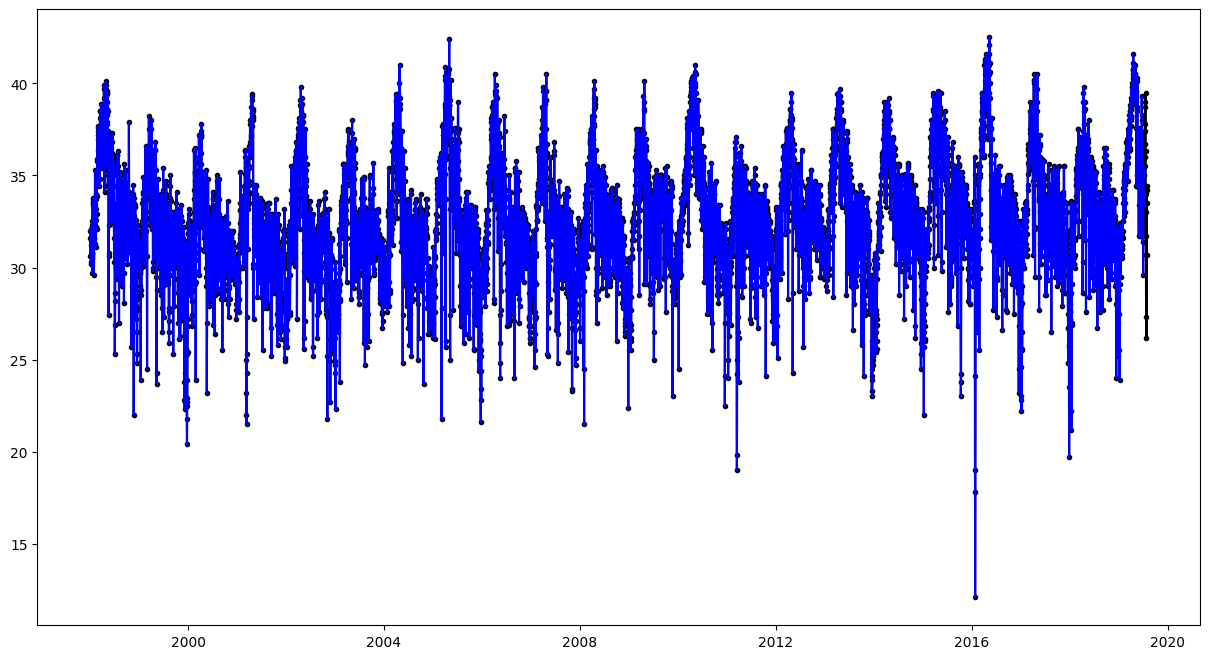

In [15]:
# 1.2 แบ่งข้อมูลออกเป็น Training และ Test set
n_test = 24  # 24 เดือนสุดท้ายสำหรับ Test set
train = data.iloc[:-n_test]
test = data.iloc[-n_test:]

print(f"\nTraining set size: {len(train)}")
print(f"Test set size: {len(test)}")

# 1.3 สร้างและเปรียบเทียบโมเดล Holt-Winters แบบต่างๆ
best_model = None
best_rmse = float('inf')
best_config = None

# ลองใช้โมเดล Holt-Winters แบบต่างๆ
models_to_test = [
    ('Additive', 'add', False),
    ('Multiplicative', 'mul', False),
    ('Damped Additive', 'add', True),
    ('Damped Multiplicative', 'mul', True)
]

print("\nกำลังทดสอบโมเดล Holt-Winters แบบต่างๆ...")

best_rmse = float('inf')
best_model_name = ""
best_forecast = None
best_fit_model = None # ใช้ตัวแปรนี้เก็บโมเดลที่ fit สำเร็จ

for name, seasonal_type, damped in models_to_test:
    try:
        model = ExponentialSmoothing(
            train,
            seasonal=seasonal_type,
            seasonal_periods=12,
            trend='add',
            damped_trend=damped
        ).fit()

        forecast = model.forecast(n_test)
        score = rmse(test, forecast)
        print(f"Model: {name}, RMSE: {score:.4f}")

        if score < best_rmse:
            best_rmse = score
            best_model_name = name
            best_forecast = forecast
            best_fit_model = model # เก็บโมเดลที่ fit สำเร็จไว้ที่นี่

    except Exception as e:
        # ดักจับข้อผิดพลาดและข้ามโมเดลที่มีปัญหาไป
        print(f"Model: {name} FAILED. Error: {e}")

print("\n--- สรุปผล ---")
if best_fit_model is not None:
    print(f"โมเดลที่ดีที่สุดคือ '{best_model_name}'")
    print(f"ค่า RMSE ต่ำที่สุดบน Test set: {best_rmse:.4f}")
else:
    print("ไม่สามารถสร้างโมเดล Holt-Winters ได้เลย กรุณาตรวจสอบข้อมูล (อาจมีค่าติดลบใน Multiplicative model)")
    exit() # หยุดการทำงานเพื่อป้องกัน error ในขั้นตอนต่อไป

# 4. แสดงแผนภาพข้อมูลจริงกับข้อมูลทำนายของโมเดลที่ดีที่สุด
# ใช้ best_forecast ที่เก็บไว้ก่อนหน้า
plt.figure(figsize=(15, 7))
plt.figure(figsize=(15, 8))
plt.plot(data.index, data, label='ข้อมูลจริง', marker='.', color='black')
plt.plot(train.index, train, label='Training Set', color='blue')
plt.plot(test.index, best_forecast, label=f'Forecast ({best_config})', color='red', linestyle='--')

plt.title(f'การทำนายอุณหภูมิรายเดือนด้วยโมเดล Holt-Winters ที่ดีที่สุด: {best_config}')
plt.xlabel('ปี')
plt.ylabel('อุณหภูมิ (C)')
plt.legend()
plt.grid(True)
plt.show()